# import all necessary libraries for the machine learning project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm 
import seaborn as sn
from sklearn import metrics, preprocessing, model_selection

# Download the dataset using kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d rohanrao/air-quality-data-in-india

100% 72.9M/72.9M [00:01<00:00, 51.3MB/s]
100% 72.9M/72.9M [00:01<00:00, 55.4MB/s]


In [ ]:
!unzip /content/air-quality-data-in-india.zip

Archive:  /content/air-quality-data-in-india.zip
  inflating: city_day.csv            
  inflating: city_hour.csv           
  inflating: station_day.csv         
  inflating: station_hour.csv        
  inflating: stations.csv            


In [ ]:
data=pd.read_csv('/content/city_hour.csv')#read the data
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


# prepressing the Dataset 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [ ]:
pd.isna(data).sum()# Check whether some values are NaN or not

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [ ]:
#Dropping columns having a missing values
data.dropna(inplace=True)

In [ ]:
pd.isna(data).sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bb43c4b50>,
      dtype=object)

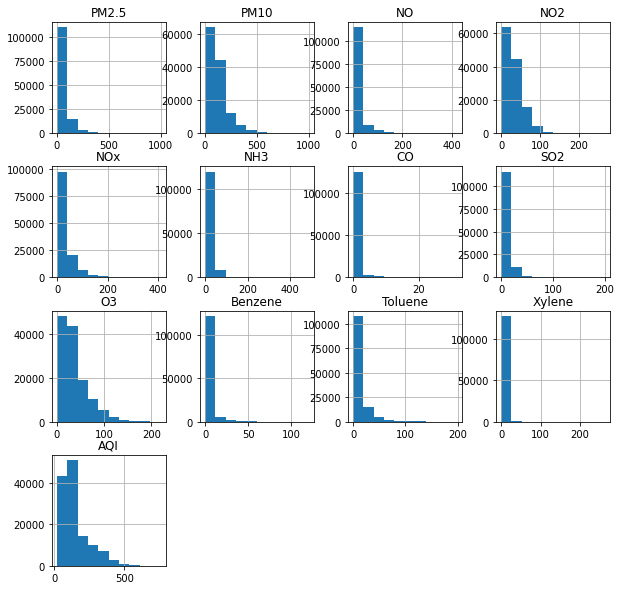

In [ ]:
data.hist(figsize=(10,10))

In [ ]:
#The describe() method returns description of the data in the DataFrame.
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000
mean,63.920899,128.279759,18.108749,32.815853,34.225690,21.820122,1.030950,11.281448,36.352084,3.912114,11.344988,2.566608,145.405873
std,62.152594,99.378185,28.985743,23.036079,35.307825,18.102877,1.572615,10.353600,27.687567,5.858445,15.042199,5.346189,97.011021
min,0.030000,1.000000,0.010000,0.100000,0.000000,0.010000,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,18.000000
25%,27.000000,63.750000,3.560000,15.420000,13.410000,10.320000,0.430000,5.500000,16.770000,0.940000,2.350000,0.220000,79.000000
50%,47.500000,101.500000,8.240000,27.200000,22.970000,15.350000,0.700000,8.830000,28.220000,2.250000,6.200000,1.000000,114.000000
75%,76.500000,157.400000,17.820000,44.100000,40.180000,29.560000,1.070000,13.600000,48.600000,4.560000,13.940000,2.690000,176.000000
max,999.990000,1000.000000,419.780000,266.730000,408.250000,485.520000,31.620000,199.930000,219.780000,120.080000,198.050000,261.950000,760.000000


In [ ]:
# drop out the city and datetime columns 
data=data[data.City=='Amaravati']
data.drop(columns=['City','Datetime'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good'],
      dtype=object)

In [ ]:
# drop the rows with the Severe
data=data[data.AQI_Bucket != 'Severe']

In [ ]:
# create new dataset the balance 
new_dataset=data[data.AQI_Bucket=='Poor']
new_dataset=new_dataset.append(data[data.AQI_Bucket=='Moderate'].iloc[:14000])
new_dataset=new_dataset.append(data[data.AQI_Bucket=='Satisfactory'].iloc[:14000])

new_dataset=new_dataset.append(data[data.AQI_Bucket=='Very Poor'])
new_dataset=new_dataset.append(data[data.AQI_Bucket=='Good'])
new_dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50914,21.00,122.50,1.35,14.78,8.93,10.40,0.10,31.10,176.40,0.20,5.12,0.08,221.0,Poor
50915,70.25,110.25,1.57,28.10,16.22,6.20,0.10,107.92,149.47,0.20,5.05,0.00,221.0,Poor
50916,64.00,105.00,1.50,20.38,12.05,7.65,0.10,98.58,142.10,0.10,4.25,0.00,221.0,Poor
50917,60.50,103.75,1.75,23.83,14.15,8.90,0.10,62.57,145.05,0.10,3.77,0.03,221.0,Poor
50918,57.00,96.50,1.35,17.02,10.15,9.92,0.10,43.23,148.00,0.10,5.10,0.00,221.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73609,23.00,37.00,1.30,11.97,7.40,13.00,0.77,12.93,30.15,0.20,1.20,0.10,41.0,Good
73610,28.25,38.75,1.30,11.47,7.15,12.70,0.72,13.42,25.70,0.20,1.12,0.10,40.0,Good
73615,24.75,34.50,2.35,8.75,6.55,11.95,0.67,14.12,35.83,0.12,0.85,0.10,40.0,Good
73641,7.00,15.00,2.65,12.27,8.70,11.55,0.64,13.70,37.45,0.23,14.65,0.23,49.0,Good


In [ ]:
# convert the labels to numerical value
data.AQI_Bucket.factorize()

(array([0, 0, 0, ..., 3, 3, 3]),
 Index(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good'], dtype='object'))

In [ ]:
# convert the labels to numerical value

new_dataset.AQI_Bucket=new_dataset.AQI_Bucket.factorize()[0]

In [ ]:
new_dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50914,21.00,122.50,1.35,14.78,8.93,10.40,0.10,31.10,176.40,0.20,5.12,0.08,221.0,0
50915,70.25,110.25,1.57,28.10,16.22,6.20,0.10,107.92,149.47,0.20,5.05,0.00,221.0,0
50916,64.00,105.00,1.50,20.38,12.05,7.65,0.10,98.58,142.10,0.10,4.25,0.00,221.0,0
50917,60.50,103.75,1.75,23.83,14.15,8.90,0.10,62.57,145.05,0.10,3.77,0.03,221.0,0
50918,57.00,96.50,1.35,17.02,10.15,9.92,0.10,43.23,148.00,0.10,5.10,0.00,221.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73609,23.00,37.00,1.30,11.97,7.40,13.00,0.77,12.93,30.15,0.20,1.20,0.10,41.0,4
73610,28.25,38.75,1.30,11.47,7.15,12.70,0.72,13.42,25.70,0.20,1.12,0.10,40.0,4
73615,24.75,34.50,2.35,8.75,6.55,11.95,0.67,14.12,35.83,0.12,0.85,0.10,40.0,4
73641,7.00,15.00,2.65,12.27,8.70,11.55,0.64,13.70,37.45,0.23,14.65,0.23,49.0,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bb46cb510>,
      dtype=object)

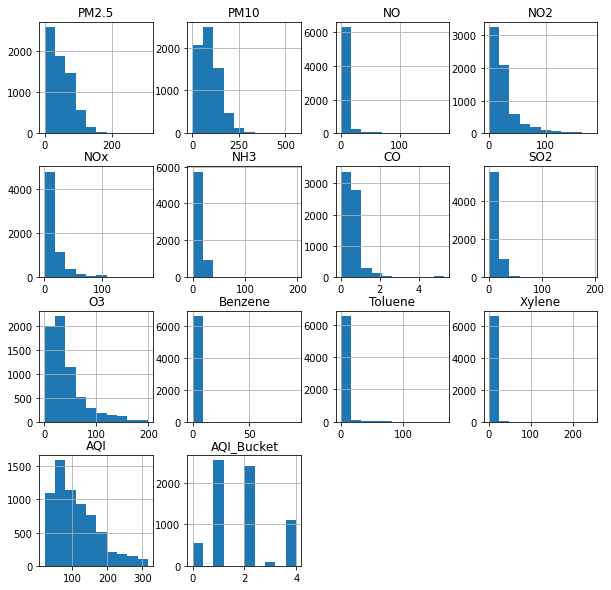

In [ ]:
# plot the histogram 
new_dataset.hist(figsize=(10,10))

In [ ]:
# split the data to features and labels 
x=new_dataset.iloc[:,:-1]
y=new_dataset.iloc[:,-1]

In [ ]:
# scale the feature values between 0,1
min_max_preprocess =preprocessing.MinMaxScaler()
min_max_preprocess.fit(x)
x_norm=min_max_preprocess.transform(x)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bb725ec10>,
      dtype=object)

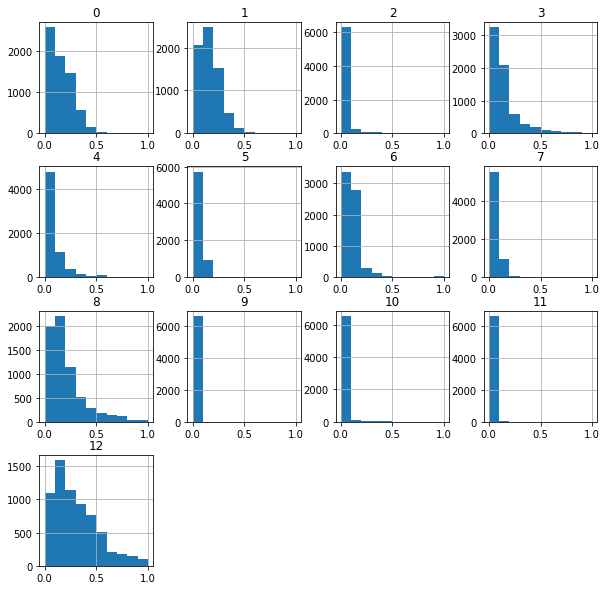

In [ ]:
pd.DataFrame(x_norm).hist(figsize=(10,10))

In [ ]:
#split the data into a training set and testing set.
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_norm,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
y_train = tf.one_hot(y_train,depth=len(set(y)))
y_test = tf.one_hot(y_test,depth=len(set(y)))

#create the data pipeline 

In [ ]:
# creat the data pipeline
def data_pipeline(x,y,batch_size=32):
    # insert the data to the data pipeline
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(50000)# shuffle the data
    data=data.batch(batch_size)# creat the batch
    data=data.prefetch(tf.data.AUTOTUNE)# run the data processing and training in parallel 
    return data

In [ ]:
# create the train pipeline 
train_dataset=data_pipeline(x_train,y_train)
# create the test pipeline
test_dataset=data_pipeline(x_test,y_test)

In [ ]:
# get the first batch of data from the train pipeline 
for x,y in train_dataset.take(1):
    print(x)
    print(y)

tf.Tensor(
[[6.64505673e-02 6.05652759e-02 8.09377139e-02 1.56213928e-01
  1.59781152e-01 3.40122303e-02 1.01886792e-01 8.24229369e-02
  2.39564519e-01 5.48847420e-04 7.75522569e-03 4.85436893e-04
  4.02027027e-01]
 [2.36628849e-01 1.94257515e-01 1.71115674e-03 1.21640191e-01
  6.51518535e-02 8.96042856e-02 0.00000000e+00 2.94917167e-02
  1.81366647e-01 2.19538968e-03 4.72584065e-02 4.04530744e-04
  4.49324324e-01]
 [6.64505673e-02 1.21579183e-01 4.72849646e-02 2.94343978e-01
  1.95790531e-01 1.15227169e-02 6.79245283e-02 1.96799508e-01
  2.22004816e-01 2.19538968e-03 1.56316268e-02 4.04530744e-04
  1.25000000e-01]
 [1.28849271e-01 1.00493495e-01 9.41136208e-03 4.28736327e-02
  2.97007593e-02 5.72598171e-02 1.52830189e-01 1.13555932e-01
  1.35711419e-01 2.19538968e-03 5.45289306e-03 4.04530744e-04
  8.78378378e-02]
 [1.12641815e-01 1.83041723e-01 6.10312571e-03 1.64074094e-01
  8.66458240e-02 1.86991459e-02 1.79245283e-01 9.62712212e-02
  3.33383504e-01 1.09769484e-03 1.54498637e-02 4.

#create the model

In [ ]:
class Model(tf.keras.Model):
  def __init__(self):
    super(Model,self).__init__()
    self.D1=tf.keras.layers.Dense(32, activation=tf.nn.leaky_relu)
    self.D2=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu)
    self.D3=tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu)
    self.D4=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu)
    self.out=tf.keras.layers.Dense(5,activation=tf.nn.softmax)
  def call(self,x):
    x=self.D1(x)
    X=self.D2(x)
    x=self.D3(x)
    x=self.D4(x)
    out=self.out(x)
    return out

In [ ]:
model=Model()
model.build(input_shape=(None,13))

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['acc'])
model.fit(train_dataset,epochs=20,validation_data=test_dataset)

Epoch 1/20
167/167 [==============================] - 3s 8ms/step - loss: 0.9015 - acc: 0.6582 - val_loss: 0.3694 - val_acc: 0.8824
Epoch 2/20
167/167 [==============================] - 1s 7ms/step - loss: 0.2673 - acc: 0.9069 - val_loss: 0.1913 - val_acc: 0.9288
Epoch 3/20
167/167 [==============================] - 1s 7ms/step - loss: 0.1775 - acc: 0.9354 - val_loss: 0.1509 - val_acc: 0.9371
Epoch 4/20
167/167 [==============================] - 2s 10ms/step - loss: 0.1393 - acc: 0.9488 - val_loss: 0.1340 - val_acc: 0.9371
Epoch 5/20
167/167 [==============================] - 1s 6ms/step - loss: 0.1180 - acc: 0.9552 - val_loss: 0.1225 - val_acc: 0.9491
Epoch 6/20
167/167 [==============================] - 1s 6ms/step - loss: 0.1060 - acc: 0.9620 - val_loss: 0.1080 - val_acc: 0.9603
Epoch 7/20
167/167 [==============================] - 1s 6ms/step - loss: 0.0935 - acc: 0.9638 - val_loss: 0.0919 - val_acc: 0.9625
Epoch 8/20
167/167 [==============================] - 1s 6ms/step - loss: 0

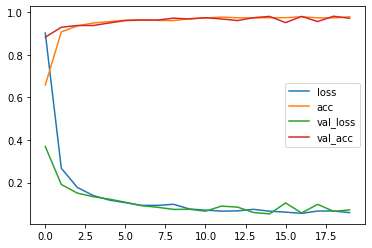

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
preds=np.array([])
ys=np.array([])
for x,y in tqdm.tqdm(test_dataset):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    preds=np.append(preds,pred)
    y= np.argmax(y,axis=-1)
  
    ys=np.append(ys,y)

100%|██████████| 42/42 [00:04<00:00,  9.56it/s]


## Model Evaluation 

accuracy_score: 0.9707865168539326
precision_score: 0.9727473204170555
recall_score: 0.9707865168539326
f1_score: 0.9711327913790574


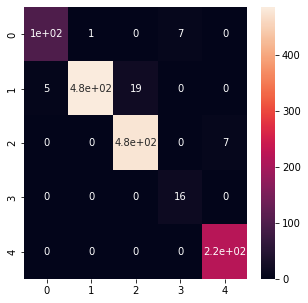

In [ ]:
accuracy_score=metrics.accuracy_score(y_true=ys,y_pred=preds)
precision_score=metrics.precision_score(ys,preds,average='weighted')
recall_score=metrics.recall_score(ys,preds,average='weighted')
f1_score=metrics.f1_score(ys,preds,average='weighted')
confion_metrix=metrics.confusion_matrix(ys,preds)
print('accuracy_score:',accuracy_score)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)
plt.figure(figsize=(5,5))
sn.heatmap(confion_metrix,annot=True,)